🔵 Importing necessary librarires

In [150]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

🟠 Loading the images

In [151]:
def image_read(filename):
  image = cv2.imread(filename)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # The image is converted from default BGR format to RGB format.
  plt.imshow(image)
  plt.show()
  return image

🟣 Read the image file

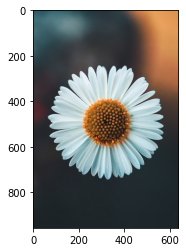

In [152]:
filename  = 'picture_4.jpg'
image = image_read(filename)

original_image = np.copy(image)

🟠 Creating the outline for the images as it is an important part in sketch

In [153]:
def draw_outline(image, line_thickess, opacity):
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) # The image is converted from default RCB format to GRAY format.
    gray_opacity = cv2.medianBlur(gray_image, opacity)

    outline = cv2.adaptiveThreshold(gray_opacity, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                                  cv2.THRESH_BINARY, line_thickess, opacity )
    
    return outline

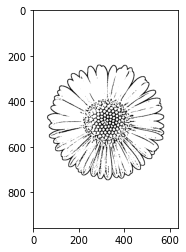

In [154]:
line_thickess, opacity = 7, 5

outline = draw_outline(image, line_thickess, opacity)
plt.imshow(outline, cmap = 'gray')
plt.show()

🔵 Color pallet reduction

In [155]:
def color_pallet(image, k):

  data = np.float32(image).reshape((-1,3)) # image transformation
  criteria = (cv2.TERM_CRITERIA_EPS+ cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001) # determininng the criteria
  
  ret, label, center = cv2.kmeans(data, k , None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
  center = np.uint8(center)

  result = center[label.flatten()]
  result = result.reshape(image.shape)

  return result

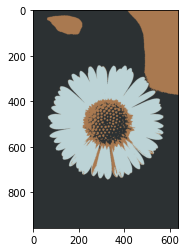

In [156]:
image = color_pallet(image, k = 3) # the value of k represents the number of colors

plt.imshow(image)
plt.show()

🟢 Noise reduction

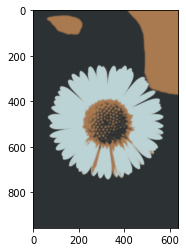

In [157]:
denoise = cv2.bilateralFilter(image, d = 10, sigmaColor = 250, sigmaSpace = 250)

plt.imshow(denoise)
plt.show()

🟡 Combining the 'color_pallet' and 'edges'

In [158]:
def sketch():
  combine = cv2.bitwise_and(denoise, denoise, mask = outline )

  plt.title("Sketch")
  plt.imshow(combine)
  plt. axis('off')
  plt.show()

  plt.title("Original Image")
  plt.imshow(original_image)
  plt. axis('off')
  plt.show()

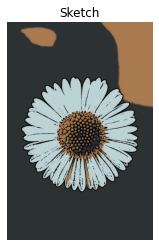

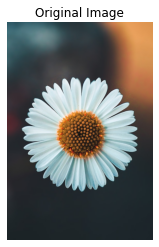

In [159]:
sketch()